<a href="https://colab.research.google.com/github/SarveshD7/Neural-Style-Transfer-Pytorch/blob/main/Neural_Style_Transfer_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
import torchvision.transforms as transforms
from torchvision.utils import save_image
from PIL import Image
from torchsummary import summary
import numpy as np
import matplotlib.pyplot as plt

In [2]:
model = models.vgg19(pretrained=True).features
device = torch.device("cuda" if (torch.cuda.is_available()) else "cpu")
device

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth
100%|██████████| 548M/548M [00:06<00:00, 87.8MB/s]


device(type='cuda')

In [27]:
def image_loader(path):
  image = Image.open(path)
  loader = transforms.Compose([transforms.Resize((512, 512)), transforms.ToTensor()])
  image = loader(image).unsqueeze(0)  # Adding an extra dimension at 0th index for Batch size
  return image


In [28]:
original_image = image_loader("/content/louvre.jpg")
style_image = image_loader("/content/monet.jpg")

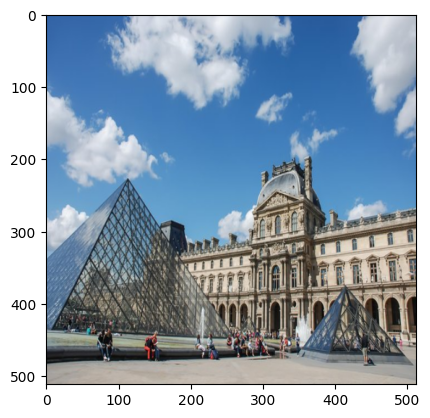

In [29]:
plt.imshow(torch.permute(original_image[0],(1,2,0)))


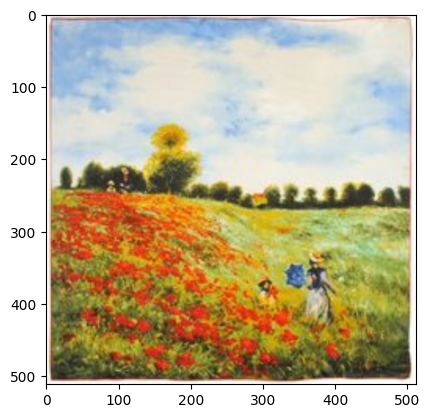

In [30]:
plt.imshow(torch.permute(style_image[0],(1, 2, 0)))

In [31]:
generated_image = original_image.clone().requires_grad_(True)

In [9]:
class VGG(nn.Module):
  def __init__(self):
    super(VGG, self).__init__()
    self.req_features = ['0','5','10','19','28']
    # We will drop all other layers since we need only these 5
    self.model = models.vgg19(pretrained=True).features[:29]

  def forward(self, x):
    features = []
    for layer_num, layer in enumerate(self.model):
      x = layer(x)
      if(str(layer_num) in self.req_features):
        features.append(x)
    return features

In [10]:
def calc_content_loss(gen_f, orig_f):
  content_loss = torch.mean((gen_f-orig_f)**2)
  return content_loss

In [11]:
def calc_style_loss(gen, style):
  batch_size, channels, height, width = gen.shape

  G = torch.mm(gen.view(channels, height*width), gen.view(channels, height*width).t())
  A = torch.mm(style.view(channels, height*width), style.view(channels, height*width).t())

  style_loss = torch.mean((G-A)**2)
  return style_loss

In [12]:
def calc_loss(gen_f, orig_f, style_f, alpha, beta):
  style_loss = content_loss = 0
  for gen, cont, style in zip(gen_f, orig_f, style_f):
    content_loss+=calc_content_loss(gen, cont)
    style_loss+=calc_style_loss(gen, style)

  total_loss = alpha*content_loss+beta*style_loss

  return total_loss

In [34]:
model = VGG()
epoch = 501
lr = 0.01
alpha = 0.1
beta = 1

optimizer = optim.Adam([generated_image], lr=lr)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [36]:
for e in range(epoch):
  print(f"Epoch--> {e}")
  gen_features = model(generated_image)
  orig_features = model(original_image)
  style_features = model(style_image)

  total_loss = calc_loss(gen_features, orig_features, style_features, alpha, beta)
  optimizer.zero_grad()
  total_loss.backward()
  optimizer.step()
  if(e%10==0):
    print(total_loss)
    save_image(generated_image, "gen_"+str(e)+".jpg")

Epoch--> 0
tensor(50042204., grad_fn=<AddBackward0>)
Epoch--> 1
Epoch--> 2
Epoch--> 3
Epoch--> 4
Epoch--> 5
Epoch--> 6
Epoch--> 7
Epoch--> 8
Epoch--> 9
Epoch--> 10
tensor(32535906., grad_fn=<AddBackward0>)
Epoch--> 11
Epoch--> 12
Epoch--> 13
Epoch--> 14
Epoch--> 15
Epoch--> 16
Epoch--> 17
Epoch--> 18
Epoch--> 19
Epoch--> 20
tensor(22719646., grad_fn=<AddBackward0>)
Epoch--> 21
Epoch--> 22
Epoch--> 23
Epoch--> 24
Epoch--> 25
Epoch--> 26
Epoch--> 27
Epoch--> 28
Epoch--> 29
Epoch--> 30
tensor(16800884., grad_fn=<AddBackward0>)
Epoch--> 31
Epoch--> 32
Epoch--> 33
Epoch--> 34
Epoch--> 35
Epoch--> 36
Epoch--> 37
Epoch--> 38
Epoch--> 39
Epoch--> 40
tensor(13015083., grad_fn=<AddBackward0>)
Epoch--> 41
Epoch--> 42
Epoch--> 43
Epoch--> 44
Epoch--> 45
Epoch--> 46
Epoch--> 47
Epoch--> 48
Epoch--> 49
Epoch--> 50
tensor(10364756., grad_fn=<AddBackward0>)
Epoch--> 51
Epoch--> 52
Epoch--> 53
Epoch--> 54
Epoch--> 55
Epoch--> 56
Epoch--> 57
Epoch--> 58
Epoch--> 59
Epoch--> 60
tensor(8366031., grad_fn=<

KeyboardInterrupt: ignored

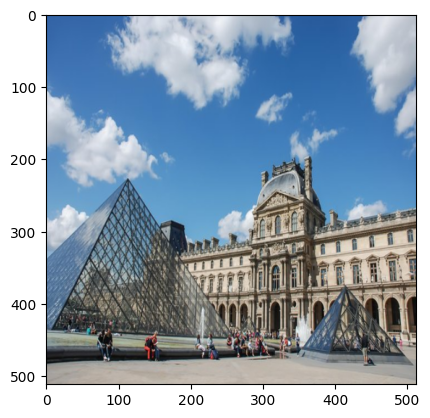

In [39]:
plt.imshow(torch.permute(original_image[0],(1,2,0)))

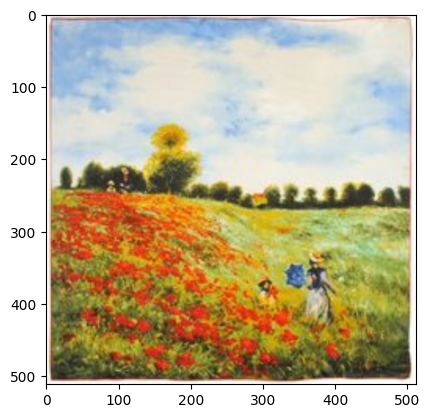

In [40]:
plt.imshow(torch.permute(style_image[0],(1,2,0)))

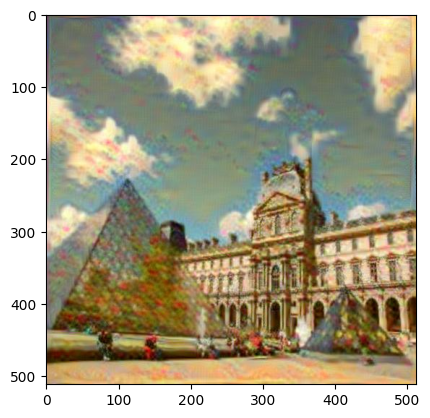

In [42]:
output_img = Image.open("gen_100.jpg")
plt.imshow(output_img)

Text(0.5, 1.0, 'Style Transfered Image')

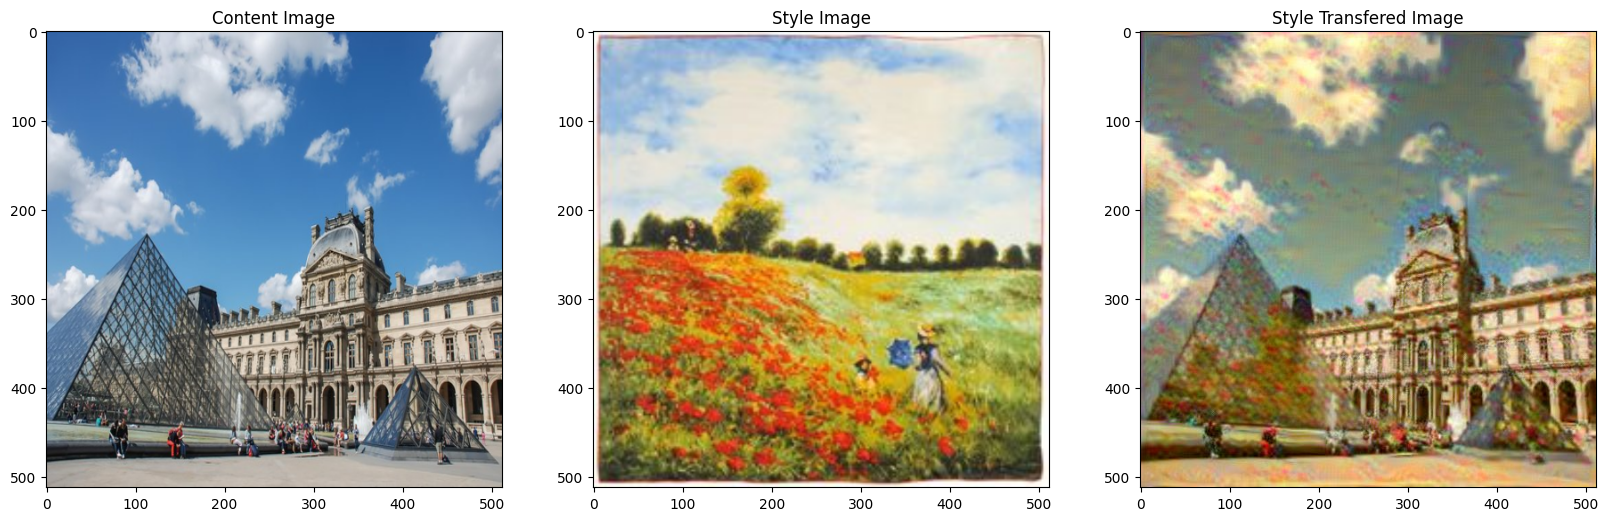

In [46]:
fig = plt.figure(figsize = (20,10))
rows = 1
cols = 3

fig.add_subplot(rows, cols, 1)
plt.imshow(torch.permute(original_image[0],(1,2,0)))
plt.title("Content Image")

fig.add_subplot(rows, cols, 2)
plt.imshow(torch.permute(style_image[0],(1,2,0)))
plt.title("Style Image")

fig.add_subplot(rows, cols, 3)
plt.imshow(output_img)
plt.title("Style Transfered Image")